In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import itertools
import os

from sklearn.metrics import confusion_matrix

# just a preference
color_map = plt.cm.Greys

In [2]:
def plot_confusion_matrices(cm1, cm2, cm3, cm4, class_labels, filename, cmap=color_map):
    # consistency
    fontsize = 16
    
    # create the figure
    fig, axes = plt.subplots(2, 2, figsize=(40, 32))
    axes = axes.flatten()
    
    # tick marks
    class_count = len(class_labels)
    tick_marks = np.arange(class_count + 1)
    
    # pretty-fy
    for ax in axes:
        ax.set_ylabel("True label", fontsize=fontsize)
        ax.set_xlabel("Predicted label", fontsize=fontsize)
        
        ax.set_xticks(tick_marks)
        ax.set_xticklabels(class_labels, rotation=45, fontsize=fontsize)
        
        ax.set_yticks(tick_marks)
        ax.set_yticklabels(class_labels, fontsize=fontsize)
    
    # numbers
    for idx, cm in enumerate([cm1, cm2, cm3, cm4]):
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            axes[idx].text(
                j,
                i,
                "{:.2f}".format(cm[i,j]),
                horizontalalignment = "center",
                color = "white" if cm[i,j] > thresh else "black",
                fontsize = fontsize)
    
        axes[idx].imshow(cm, interpolation="nearest", cmap=cmap)
    
    # save and show
    np.set_printoptions(formatter={"float": lambda x: "{0:0.2f}".format(x)})
    fig.subplots_adjust(hspace=0.1, wspace=-0.325)
    plt.savefig(filename, bbox_inches="tight", pad_inches=0.05)
    plt.show(block=False)

In [3]:
labels = {i: i + 1 for i in range(11)}

# read confusion matrices
mlp_balanced = np.loadtxt(
    os.path.join(os.getcwd(), "mlp", "stats", "final_model_balanced_confusion_matrix.txt"), 
    delimiter=",")

mlp_imbalanced = np.loadtxt(
    os.path.join(os.getcwd(), "mlp", "stats", "final_model_all_confusion_matrix.txt"), 
    delimiter=",")

cnn_balanced = np.loadtxt(
    os.path.join(os.getcwd(), "stats", "final_model_balanced_confusion_matrix.txt"), 
    delimiter=",")

cnn_imbalanced = np.loadtxt(
    os.path.join(os.getcwd(), "stats", "final_model_all_confusion_matrix.txt"), 
    delimiter=",")

# scale up to percentages
mlp_balanced *= 100
mlp_imbalanced *= 100
cnn_balanced *= 100
cnn_imbalanced *= 100

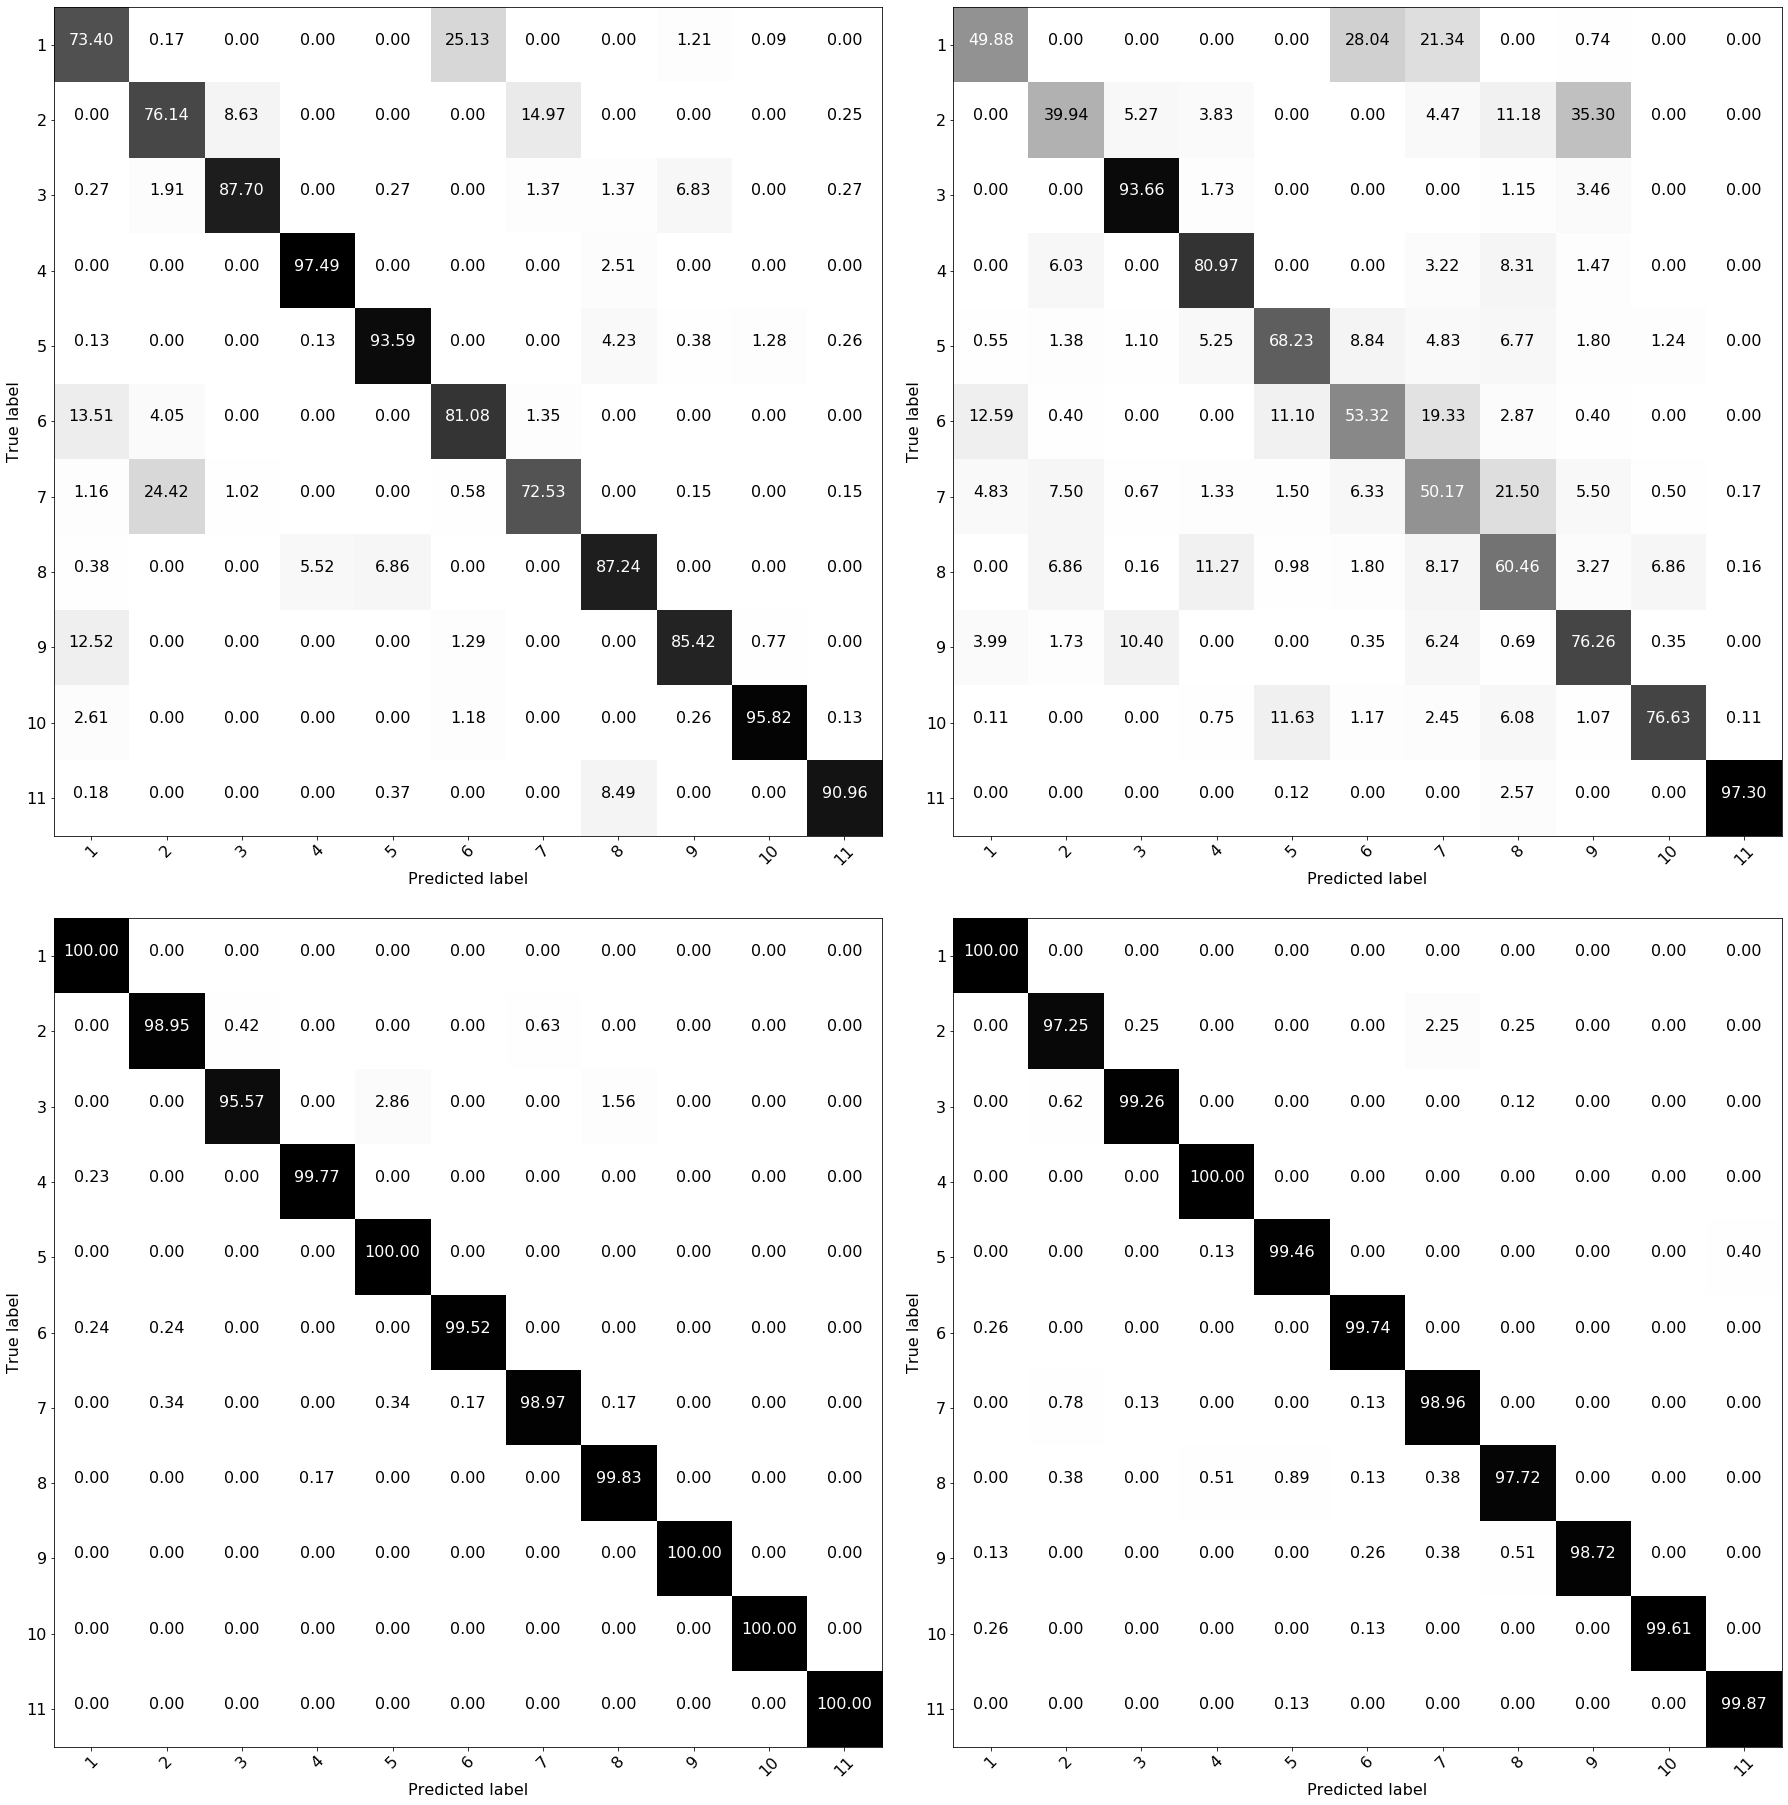

In [4]:
directory = "/Users/david/Documents/masters/thesis/images/"
plot_confusion_matrices(mlp_imbalanced, mlp_balanced, cnn_imbalanced, cnn_balanced,
                        labels.values(), os.path.join(directory, "DeepLearningConfusionMatricesArbID.pdf"))

In [5]:
results = np.hstack((
    np.diag(mlp_imbalanced).reshape(-1,1),
    np.diag(mlp_balanced).reshape(-1,1),
    np.diag(cnn_imbalanced).reshape(-1,1),
    np.diag(cnn_balanced).reshape(-1,1)
))

df = pd.DataFrame(
    results,
    columns = ["MLP Imbalanced", "MLP Balanced", "CNN Imbalanced", "CNN Balanced"],
    index = labels.values()
)

display(df)

,MLP Imbalanced,MLP Balanced,CNN Imbalanced,CNN Balanced
1,73.3969,49.8759,100.0000,100.0000
2,76.1421,39.9361,98.9518,97.2500
3,87.7049,93.6599,95.5729,99.2583
4,97.4943,80.9651,99.7743,100.0000
5,93.5897,68.2320,100.0000,99.4609
6,81.0811,53.3201,99.5204,99.7375
7,72.5291,50.1667,98.9744,98.9624
8,87.2381,60.4575,99.8311,97.7157
9,85.4194,76.2565,100.0000,98.7229
10,95.8170,76.6275,100.0000,99.6114


In [6]:
# for each vehicle...
for vehicle, row in df.iterrows():
    items = [str(vehicle)]
    
    # accuracies
    for i in row:
        item = "{:.2f}".format(i)
        
#         if i == np.max(row):
#             item = "\\cellcolor{grey}" + item
        
        items.append(item + " \\%")
    
    # median accuracy
    items.append("{:.2f}".format(np.median(row)))
    
    # latex table row
    print(" & ".join(items), "\\\\")

1 & 73.40 \% & 49.88 \% & 100.00 \% & 100.00 \% & 86.70 \\
2 & 76.14 \% & 39.94 \% & 98.95 \% & 97.25 \% & 86.70 \\
3 & 87.70 \% & 93.66 \% & 95.57 \% & 99.26 \% & 94.62 \\
4 & 97.49 \% & 80.97 \% & 99.77 \% & 100.00 \% & 98.63 \\
5 & 93.59 \% & 68.23 \% & 100.00 \% & 99.46 \% & 96.53 \\
6 & 81.08 \% & 53.32 \% & 99.52 \% & 99.74 \% & 90.30 \\
7 & 72.53 \% & 50.17 \% & 98.97 \% & 98.96 \% & 85.75 \\
8 & 87.24 \% & 60.46 \% & 99.83 \% & 97.72 \% & 92.48 \\
9 & 85.42 \% & 76.26 \% & 100.00 \% & 98.72 \% & 92.07 \\
10 & 95.82 \% & 76.63 \% & 100.00 \% & 99.61 \% & 97.71 \\
11 & 90.96 \% & 97.30 \% & 100.00 \% & 99.87 \% & 98.59 \\
